In [1]:
from keras.models import Sequential

model = Sequential()

c:\users\varun\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten, MaxPooling2D, Convolution2D

In [3]:
#preprocessing
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(64, 64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1, activation='sigmoid'))

c:\users\varun\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\varun\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
c:\users\varun\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  import sys


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
test_set= test_datagen.flow_from_directory('dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=500,
        epochs=15,
        validation_data=test_set,
validation_steps=200)

Epoch 1/15
500/500 [==============================] - 27s 54ms/step - loss: 0.5865 - acc: 0.6871 - val_loss: 0.5428 - val_acc: 0.7303
Epoch 2/15
500/500 [==============================] - 24s 49ms/step - loss: 0.4604 - acc: 0.7822 - val_loss: 0.5573 - val_acc: 0.7271
Epoch 3/15
500/500 [==============================] - 24s 48ms/step - loss: 0.3708 - acc: 0.8340 - val_loss: 0.5547 - val_acc: 0.7522
Epoch 4/15
500/500 [==============================] - 24s 49ms/step - loss: 0.2951 - acc: 0.8774 - val_loss: 0.6183 - val_acc: 0.7559
Epoch 5/15
500/500 [==============================] - 25s 49ms/step - loss: 0.2300 - acc: 0.9061 - val_loss: 0.6509 - val_acc: 0.7652
Epoch 6/15
500/500 [==============================] - 25s 50ms/step - loss: 0.1770 - acc: 0.9316 - val_loss: 0.6930 - val_acc: 0.7452
Epoch 7/15
500/500 [==============================] - 24s 49ms/step - loss: 0.1363 - acc: 0.9493 - val_loss: 0.7866 - val_acc: 0.7458
Epoch 8/15
500/500 [==============================] - 24s 48ms

In [11]:
model.save('model.h5')
model.save_weights('weights.h5')

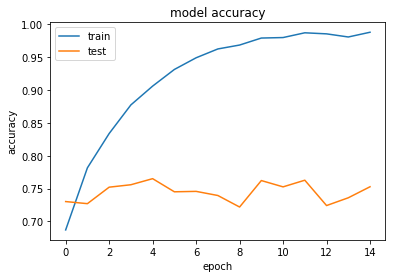

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# from IPython.display import Inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

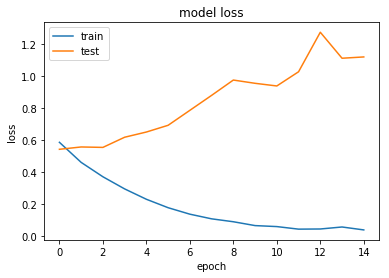

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()